# Hands-on on Lattice Calculation in Python

*D. Gamba, A. Latina, T. Prebibaj, F. Soubelet*

[CAS 2024 - Introduction to Accelerator Physics](https://indico.cern.ch/event/1356988/) (22 September - 5 October 2024, Santa Susanna, Spain).

<p align="center">
<img src=./_img_exercises/banner.png width="80%">
</p>

## Introduction 

- The *Hands-on Lattice Calculations in Python* course is meant to present you a series of "conceptual" exercises to help understanding the basics of transverse beam dynamics.
As you can guess, these exercises are expected to be solved using *Python*. 

- We will suggest *a possible way* for translating the exercises we propose into Python, but most of the time the result can be achieved using multiple paths and we encourage the student to explore them. 

- **The goal is to stimulate the student's curiosity, so the simple exercise should be challenged to trigger more questions and to dive deeper into the physics of the problem.**

## Is your computer ready?

You received the [instructions](./Setup_Instructions.md) on how to prepare your python working environment.

**QUESTION: is everyone able to launch a jupyter lab server from her/his laptop?** 

**QUESTION: can you import the following packages without errors?** 


In [1]:
# numpy: our main numerical package
import numpy as np
# matplotlib and seaborn: our plotting packages
import matplotlib.pyplot as plt
import seaborn as sns

# linear algebra and optimisation algorithms
from numpy.linalg import norm
from scipy.optimize import minimize
# some useful package
from copy import deepcopy

# **Optional:** for animations you might need to configure your jupyter lab properly:
# > pip install ipywidgets
# > jupyter nbextension enable --py widgetsnbextension
from ipywidgets import interactive

### ... some other setup not to be bothered later

Let's also configure `matplotlib` for more presentation-friendly plot production

In [2]:
# some setup for the plotting
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

In [3]:
# ignore "FutureWarning"... (temporary patch for seaborn package issues...)
#import warnings
#warnings.simplefilter(action='ignore', category=FutureWarning)

---

# Essentials

---

## The Python Basics

lists, dictionaries, and numpy arrays...

In [4]:
# a list of object is defined with [], and element accessed with [idx]
my_list = [1,2,3,4]
print(f"The third element in my list is: {my_list[2]}")

# a list can contain any object, also another list to 
# "fake" multi-dimensional arrays
my_list_of_lists = [[1,2,3,4],[5,6,7,8]]
print(f"A list of lists looks almost like a matrix:\n"
      f"{my_list_of_lists}")

# a dictionary is defined with {}, and elements are accessed 
# with ['key_value']
my_dictionary = {'a_key': 34, 
                 'another_key': 'value as string', 
                 3: 'value associated to an int key'}
print(f"The value associated to key 'a_key' in 'my_dictionary' is: \n"
      f"    {my_dictionary['a_key']}")

The third element in my list is: 3
A list of lists looks almost like a matrix:
[[1, 2, 3, 4], [5, 6, 7, 8]]
The value associated to key 'a_key' in 'my_dictionary' is: 
    34


In [5]:
# a numpy array can be created from a list of numbers
my_2D_array = np.array(my_list_of_lists)
print(f"np.array is a nicer representation of matrices:\n"
      f"{my_2D_array}")
print(f"First row, second column value is: {my_2D_array[0,1]}")

# or from a random generator
my_random_2D_array = np.random.randn(2,100)

# and one can do mathematical operations
print(f"means (over column idx, i.e. dim=1): \n"
      f"   {np.mean(my_random_2D_array,1)}\n"
      f"and std: \n"
      f"   {np.std(my_random_2D_array,1)}")

np.array is a nicer representation of matrices:
[[1 2 3 4]
 [5 6 7 8]]
First row, second column value is: 2
means (over column idx, i.e. dim=1): 
   [-0.134526    0.04509082]
and std: 
   [0.85033577 0.94587258]


### Plotting and number generation

- one typically uses matplotlib (`import matplotlib.pyplot as plt`) for plots.
- numpy includes functions to easily generate equally spaced numbers (`np.linspace(...)`) or Gaussian-distributed (`np.random.randn(...)`)

Text(0, 0.5, 'y_data for 2 curves')

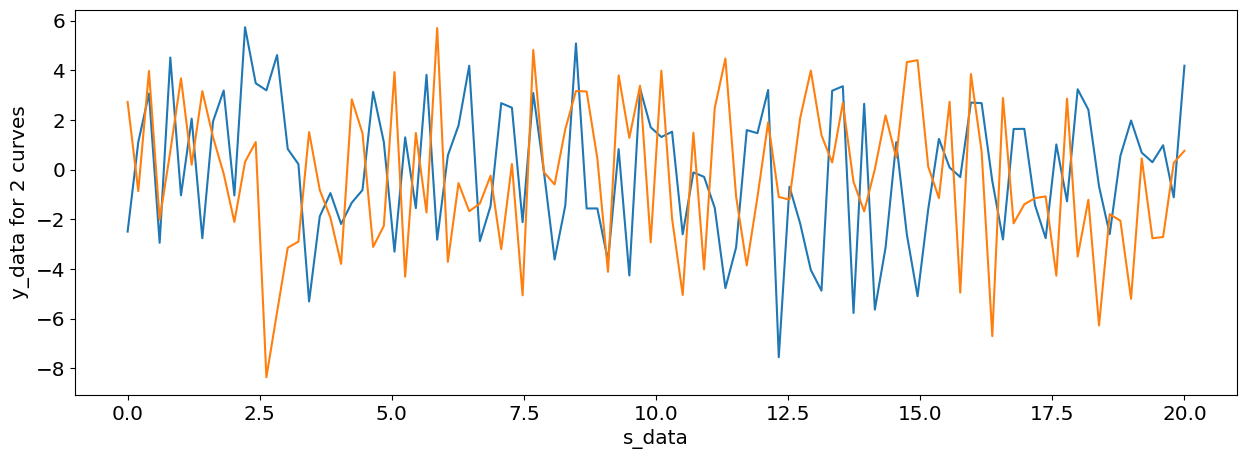

In [6]:
# simple plot
#  generate 100 points equally spaced between 0 and 20
s_data = np.array(np.linspace(0,20,100)) 
#  generate 100x2 random points (Gaussian distributed with std=3)
y_data = 3*np.random.randn(100,2) 
plt.plot(s_data, y_data)
plt.xlabel('s_data')
plt.ylabel('y_data for 2 curves')

#### Something more fancy:
One can profit of seaborn (`import seaborn as sns`) for more complex/nicer plots.

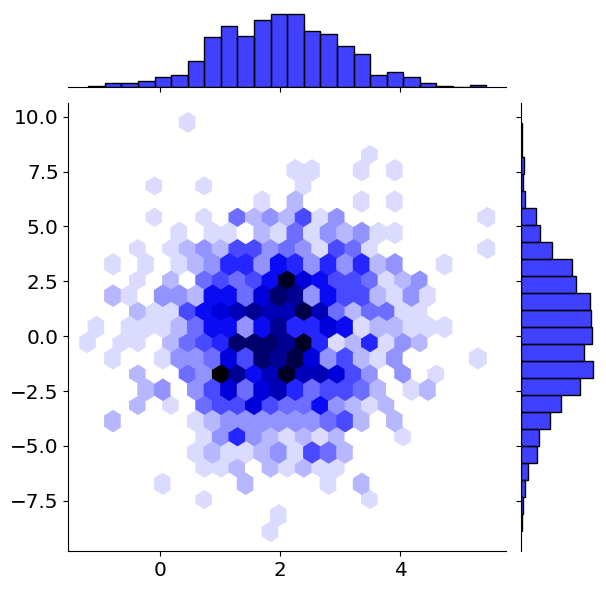

In [7]:
# something more fancy
x_data = np.random.randn(1000)+2
y_data = 3*np.random.randn(1000)
sns.jointplot(x=x_data, y=y_data, kind="hex", color="b")

#### Something even more fancy: animations (optional)

one can profit of the "interactive" package (`from ipywidgets import interactive`)
for creating user-friendly interactive plots, e.g. while varying a parameter

interactive(children=(FloatSlider(value=0.0, description='a', max=1.0, min=-1.0), FloatSlider(value=0.0, descr…

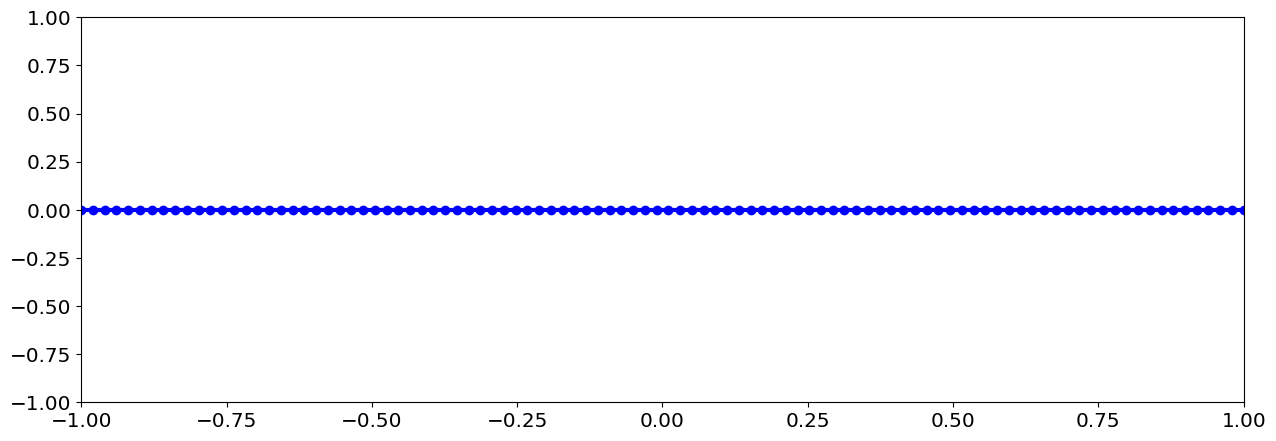

In [8]:
# define x array
data_x = np.linspace(-1,1,100)

# define the function to be executed at each change of some input parameter
def plotIt(a, b, c):
    data_y = a*(data_x)**3 + b*(data_x)**2 + c*(data_x)
    plt.plot(data_x, data_y, 'o-b', lw=3)
    plt.xlim([-1,1])
    plt.ylim([-1,1])

# create interactive plot, and display it
interactive_plot = interactive(plotIt,a=(-1,1,.1),b=(-2,2,.1),c=(-3,3,.1),continuous_update=True)
#sometimes needed:
# interactive_plot.children[-1].layout.height = '350px'
display(interactive_plot)

---
# Structure of the Hands-On Course
---

The course is organised in a few **main** notebooks:

- [02_Single_Particle_Beamline](./02_Single_Particle_Beamline.ipynb)
- [03_Multi_Particles_Beamline](./03_Multi_Particles_Beamline.ipynb)
- [04_Periodic_Systems](./04_Periodic_Systems.ipynb)
- [05_Advanced_Exercises](./05_Advanced_Exercises.ipynb)

The some simple library/functions are gathered in the [tracking_library.py](./tracking_library.py) file, which can be imported in any notebook as:
```
from tracking_library import *
```

### For who is fast...

For each notebook, there are **optional** notebooks with some additional insights for who has the time and curiosity, i.e.:

- [02_Single_Particle_Beamline](./02_Single_Particle_Beamline.ipynb)
- [03_Multi_Particles_Beamline](./03_Multi_Particles_Beamline.ipynb)
- [04_Periodic_Systems](./04_Periodic_Systems.ipynb)
- [05_Advanced_Exercises](./05_Advanced_Exercises.ipynb)

For some of those, you might need to extend the tracking library. You can find the canvas where to extend the library in [tracking_library_advanced.py](./tracking_library_advanced.py), and/or you can simply look at the fully developed solution [tracking_library_advanced_solution.py](./tracking_library_advanced_solution.py)


## Let's start!

=> **Start this adventure with the first [notebook](./new_01_Guided.ipynb)**...
